##### Let's load the appropriate libraries:

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Pre-Processing
###### Let's Load the data

In [130]:
data = pd.read_csv("Dataset/chronic_kidney_diseases.csv")

In [131]:
data.head(10)

,Unnamed: 0,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000,NaN,no,no,no,good,no,no,ckd
1,1,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500,NaN,no,yes,no,poor,no,yes,ckd
2,2,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700,3.9,yes,no,no,poor,yes,yes,ckd
3,3,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300,4.6,no,no,no,good,no,no,ckd
4,4,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39.0,7800,4.4,yes,yes,no,good,yes,no,ckd
5,5,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36.0,NaN,NaN,no,no,no,good,no,no,ckd
6,6,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44.0,6900,5,no,yes,no,good,yes,no,ckd
7,7,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33.0,9600,4.0,yes,yes,no,good,no,yes,ckd
8,8,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29.0,12100,3.7,yes,yes,no,poor,no,yes,ckd
9,9,50.0,60.0,1.010,2.0,4.0,NaN,abnormal,present,notpresent,...,28.0,NaN,NaN,yes,yes,no,good,no,yes,ckd


In [132]:
data.shape

(679, 26)

Checking if there's any duplicates

In [133]:
data.drop_duplicates()
data.shape

(679, 26)

###### So no duplicates present

In [134]:
data.columns

Index(['Unnamed: 0', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
       'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm',
       'cad', 'appet', 'pe', 'ane', 'classification'],
      dtype='object')

##### Checking the data types:

In [135]:
data.drop('Unnamed: 0',axis=1, inplace=True)

In [136]:
data.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

Let's check the total number of Chronic kidney disease and not chronic kidney diseases.

In [137]:
data.classification.value_counts()

ckd       423
notckd    256
Name: classification, dtype: int64

Let's draw a graph to see where the values lies:

In [138]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

Let's drop the unnecessary features and check unique values

In [139]:
for i in data.columns:
    print(f"Unique values in {i}", data[i].unique())

Unique values in age [ 7. 62. 48. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
Unique values in bp [ 50.  80.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
Unique values in sg [1.02  1.01  1.005 1.015   nan 1.025]
Unique values in al [ 4.  2.  3.  0. nan  1.  5.]
Unique values in su [ 0.  3.  4.  1. nan  2.  5.]
Unique values in rbc [nan 'normal' 'abnormal']
Unique values in pc ['normal' 'abnormal' nan]
Unique values in pcc ['notpresent' 'present' nan]
Unique values in ba ['notpresent' 'present' nan]
Unique values in bgr [ nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98. 157.
  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159. 140.
 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253. 141.
 182

We can see there are missing values and typos that need to be fixed.

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             665 non-null    float64
 1   bp              658 non-null    float64
 2   sg              596 non-null    float64
 3   al              598 non-null    float64
 4   su              592 non-null    float64
 5   rbc             421 non-null    object 
 6   pc              564 non-null    object 
 7   pcc             671 non-null    object 
 8   ba              671 non-null    object 
 9   bgr             602 non-null    float64
 10  bu              646 non-null    float64
 11  sc              650 non-null    float64
 12  sod             526 non-null    float64
 13  pot             524 non-null    float64
 14  hemo            588 non-null    float64
 15  pcv             557 non-null    float64
 16  wc              496 non-null    object 
 17  rc              455 non-null    obj

In [141]:
data.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv
count,665.000000,658.000000,596.000000,598.000000,592.000000,602.000000,646.000000,650.000000,526.000000,524.000000,588.000000,557.000000
mean,51.476692,76.291793,1.017416,1.020067,0.445946,148.963455,57.276935,3.048000,137.418251,4.678626,12.523639,38.991023
std,17.296314,13.922594,0.005728,1.362183,1.088527,78.498526,50.890551,5.785839,10.930036,3.460728,2.897952,8.900828
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,100.000000,27.000000,0.900000,135.000000,3.800000,10.400000,33.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,122.000000,41.000000,1.300000,138.000000,4.400000,12.700000,40.000000
75%,65.000000,80.000000,1.020000,2.000000,0.000000,169.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000


# Data Cleaning

Removing all the wrong values like \t etc:

Rename columns to clarify the names and to show full names on plots.

In [142]:
columns_names=['Age (years)','Blood Pressure (mm/Hg)','Specific Gravity','Albumin','Sugar','Red Blood Cells',
               'Pus Cells','Pus Cell Clumps','Bacteria','Blood Glucose Random (mgs/dL)','Blood Urea (mgs/dL)',
               'Serum Creatinine (mgs/dL)','Sodium (mEq/L)','Potassium (mEq/L)','Hemoglobin (gms)','Packed Cell Volume',
               'White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Hypertension','Diabetes Mellitus',
               'Coronary Artery Disease','Appetite','Pedal Edema','Anemia','Chronic Kidney Disease']
data.columns=columns_names

In [143]:
data.head()

,Age (years),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000,NaN,no,no,no,good,no,no,ckd
1,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500,NaN,no,yes,no,poor,no,yes,ckd
2,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700,3.9,yes,no,no,poor,yes,yes,ckd
3,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300,4.6,no,no,no,good,no,no,ckd
4,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39.0,7800,4.4,yes,yes,no,good,yes,no,ckd


Let's deal with wrong datatype values now.

In [144]:
for i in data.columns:
    print(f"Unique values in {i}:\n",data[i].unique())

Unique values in Age (years):
 [ 7. 62. 48. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
Unique values in Blood Pressure (mm/Hg):
 [ 50.  80.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
Unique values in Specific Gravity:
 [1.02  1.01  1.005 1.015   nan 1.025]
Unique values in Albumin:
 [ 4.  2.  3.  0. nan  1.  5.]
Unique values in Sugar:
 [ 0.  3.  4.  1. nan  2.  5.]
Unique values in Red Blood Cells:
 [nan 'normal' 'abnormal']
Unique values in Pus Cells:
 ['normal' 'abnormal' nan]
Unique values in Pus Cell Clumps:
 ['notpresent' 'present' nan]
Unique values in Bacteria:
 ['notpresent' 'present' nan]
Unique values in Blood Glucose Random (mgs/dL):
 [ nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98. 157.
  76.  99. 11

Some numerical features are mistyped as strings. Let's Solve that.

In [145]:
data['Red Blood Cells (millions/cmm)'] = data['Red Blood Cells (millions/cmm)'].replace(to_replace = {'\t?':np.nan})

In [146]:
data['White Blood Cells (cells/cmm)'] = data['White Blood Cells (cells/cmm)'].replace(to_replace = {'\t?':np.nan, '\t8400':'8400'})

In [147]:
mistyped=['Packed Cell Volume','White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)']
numeric=[]
for i in data.columns:
    if data[i].dtype=='float64':
        numeric.append(i)
numeric=numeric+mistyped

In [148]:
for i in data.columns:
    print(f"Unique values in {i}:\n",data[i].unique())

Unique values in Age (years):
 [ 7. 62. 48. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
Unique values in Blood Pressure (mm/Hg):
 [ 50.  80.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
Unique values in Specific Gravity:
 [1.02  1.01  1.005 1.015   nan 1.025]
Unique values in Albumin:
 [ 4.  2.  3.  0. nan  1.  5.]
Unique values in Sugar:
 [ 0.  3.  4.  1. nan  2.  5.]
Unique values in Red Blood Cells:
 [nan 'normal' 'abnormal']
Unique values in Pus Cells:
 ['normal' 'abnormal' nan]
Unique values in Pus Cell Clumps:
 ['notpresent' 'present' nan]
Unique values in Bacteria:
 ['notpresent' 'present' nan]
Unique values in Blood Glucose Random (mgs/dL):
 [ nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98. 157.
  76.  99. 11

In [149]:
for col in mistyped:
        data[col]=data[col].astype('float')

In [150]:
print(data['Packed Cell Volume'].unique())
print(data['White Blood Cells (cells/cmm)'].unique())
print(data['Red Blood Cells (millions/cmm)'].unique())

[38. 31. 32. 35. 39. 36. 44. 33. 29. 28. nan 16. 24. 37. 30. 34. 40. 45.
 27. 48. 52. 14. 22. 18. 42. 17. 46. 23. 19. 25. 41. 26. 15. 21. 43. 20.
 47.  9. 49. 50. 53. 51. 54.]
[ 6000.  7500.  6700.  7300.  7800.    nan  6900.  9600. 12100.  4500.
 12200. 11000.  3800. 11400.  5300.  9200.  6200.  8300.  8400. 10300.
  9800.  9100.  7900.  6400.  8600. 18900. 21600.  4300.  8500. 11300.
  7200.  7700. 14600.  6300.  7100. 11800.  9400.  5500.  5800. 13200.
 12500.  5600.  7000. 11900. 10400. 10700. 12700.  6800.  6500. 13600.
 10200.  9000. 14900.  8200. 15200.  5000. 16300. 12400. 10500.  4200.
  4700. 10900.  8100.  9500.  2200. 12800. 11200. 19100. 12300. 16700.
  2600. 26400.  8800.  7400.  4900.  8000. 12000. 15700.  4100.  5700.
 11500.  5400. 10800.  9900.  5200.  5900.  9300.  9700.  5100.  6600.]
[nan 3.9 4.6 4.4 5.  4.  3.7 3.8 3.4 2.6 2.8 4.3 3.2 3.6 4.1 4.9 2.5 4.2
 4.5 3.1 4.7 3.5 6.  5.2 2.1 5.6 2.3 2.9 2.7 8.  3.3 3.  2.4 4.8 5.4 6.1
 6.2 6.3 5.1 5.8 5.5 5.3 6.4 5.7 5.9 6

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (years)                     665 non-null    float64
 1   Blood Pressure (mm/Hg)          658 non-null    float64
 2   Specific Gravity                596 non-null    float64
 3   Albumin                         598 non-null    float64
 4   Sugar                           592 non-null    float64
 5   Red Blood Cells                 421 non-null    object 
 6   Pus Cells                       564 non-null    object 
 7   Pus Cell Clumps                 671 non-null    object 
 8   Bacteria                        671 non-null    object 
 9   Blood Glucose Random (mgs/dL)   602 non-null    float64
 10  Blood Urea (mgs/dL)             646 non-null    float64
 11  Serum Creatinine (mgs/dL)       650 non-null    float64
 12  Sodium (mEq/L)                  526 

Now let's replace the Categorical values with numbers. All the Numerical features were already put together in a list named numeric.

In [152]:
numeric

['Age (years)',
 'Blood Pressure (mm/Hg)',
 'Specific Gravity',
 'Albumin',
 'Sugar',
 'Blood Glucose Random (mgs/dL)',
 'Blood Urea (mgs/dL)',
 'Serum Creatinine (mgs/dL)',
 'Sodium (mEq/L)',
 'Potassium (mEq/L)',
 'Hemoglobin (gms)',
 'Packed Cell Volume',
 'Packed Cell Volume',
 'White Blood Cells (cells/cmm)',
 'Red Blood Cells (millions/cmm)']

In [153]:
data.head()

,Age (years),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
1,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
2,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
3,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
4,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd


### Replacing Categorical Values

1. Red Blood Cells

In [154]:
data["Red Blood Cells"].value_counts()

normal      345
abnormal     76
Name: Red Blood Cells, dtype: int64

In [155]:
data['Red Blood Cells'] = data['Red Blood Cells'].replace(to_replace={"normal":0,"abnormal":1})
data['Red Blood Cells'].value_counts()

0.0    345
1.0     76
Name: Red Blood Cells, dtype: int64

2. Pus Cells

In [156]:
data["Pus Cells"].value_counts()

normal      439
abnormal    125
Name: Pus Cells, dtype: int64

In [157]:
data['Pus Cells'] = data['Pus Cells'].replace(to_replace={"normal":0 , "abnormal":1})

In [158]:
data.head()

,Age (years),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,7.0,50.0,1.020,4.0,0.0,NaN,0.0,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
1,62.0,80.0,1.010,2.0,3.0,0.0,0.0,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
2,48.0,70.0,1.005,4.0,0.0,0.0,1.0,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
3,51.0,80.0,1.010,2.0,0.0,0.0,0.0,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
4,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39.0,7800.0,4.4,yes,yes,no,good,yes,no,ckd


3. Pus Cell Clumps

In [159]:
data['Pus Cell Clumps'].value_counts()

notpresent    603
present        68
Name: Pus Cell Clumps, dtype: int64

In [160]:
data['Pus Cell Clumps'] = data['Pus Cell Clumps'].replace(to_replace = {'notpresent':0,'present':1})

4. Bacteria

In [161]:
data["Bacteria"].value_counts()

notpresent    633
present        38
Name: Bacteria, dtype: int64

In [162]:
data["Bacteria"]= data["Bacteria"].replace(to_replace = {'notpresent':0,'present':1})

5. Hypertension

In [163]:
data["Hypertension"].value_counts()

no     428
yes    248
Name: Hypertension, dtype: int64

In [164]:
data["Hypertension"] = data["Hypertension"].replace(to_replace = {'yes' : 1, 'no' : 0})

In [165]:
data.head()

,Age (years),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,no,no,good,no,no,ckd
1,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,yes,no,poor,no,yes,ckd
2,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,no,no,poor,yes,yes,ckd
3,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,no,no,good,no,no,ckd
4,60.0,90.0,1.015,3.0,0.0,NaN,NaN,0.0,0.0,74.0,...,39.0,7800.0,4.4,1.0,yes,no,good,yes,no,ckd


6. Diabetes Mellitus

In [166]:
data["Diabetes Mellitus"].value_counts()

no       436
yes      234
\tno       3
\tyes      2
 yes       1
Name: Diabetes Mellitus, dtype: int64

In [167]:
data["Diabetes Mellitus"] = data["Diabetes Mellitus"].replace(to_replace={'yes' : 1, 'no' : 0,'\tno':0, '\tyes':1,' yes':1})

In [168]:
data["Diabetes Mellitus"].value_counts()

0.0    439
1.0    237
Name: Diabetes Mellitus, dtype: int64

7. Coronary Artery Disease

In [169]:
data["Coronary Artery Disease"].value_counts()

no      617
yes      57
\tno      2
Name: Coronary Artery Disease, dtype: int64

In [170]:
data["Coronary Artery Disease"] = data["Coronary Artery Disease"].replace(to_replace = {'yes' : 1, 'no' : 0,'\tno':0})

In [171]:
data.head()

,Age (years),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0.0,0.0,good,no,no,ckd
1,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,poor,no,yes,ckd
2,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,poor,yes,yes,ckd
3,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,good,no,no,ckd
4,60.0,90.0,1.015,3.0,0.0,NaN,NaN,0.0,0.0,74.0,...,39.0,7800.0,4.4,1.0,1.0,0.0,good,yes,no,ckd


8. Appetite

In [172]:
data["Appetite"].unique()

array(['good', 'poor', nan], dtype=object)

In [173]:
data["Appetite"] = data["Appetite"].replace(to_replace={'good':1,'poor':0})

9. Pedal Edema

In [174]:
data["Pedal Edema"].value_counts()

no     551
yes    127
Name: Pedal Edema, dtype: int64

In [175]:
data["Pedal Edema"] = data["Pedal Edema"].replace(to_replace = {'yes' : 1, 'no' : 0})

10. Anemia

In [176]:
data["Anemia"].value_counts()

no     578
yes    100
Name: Anemia, dtype: int64

In [177]:
data["Anemia"] = data["Anemia"].replace(to_replace = {'yes' : 1, 'no' : 0})

11. Chronic Kidney Disease 

In [178]:
data["Chronic Kidney Disease"].value_counts()

ckd       423
notckd    256
Name: Chronic Kidney Disease, dtype: int64

In [180]:
data["Chronic Kidney Disease"] = data["Chronic Kidney Disease"].replace(to_replace = {'ckd' : 1, 'notckd' : 0})

In [182]:
data["Chronic Kidney Disease"].value_counts()

1    423
0    256
Name: Chronic Kidney Disease, dtype: int64

In [181]:
data.head(10)

,Age (years),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38.0,6000.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
1,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31.0,7500.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
2,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
3,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
4,60.0,90.0,1.015,3.0,0.0,NaN,NaN,0.0,0.0,74.0,...,39.0,7800.0,4.4,1.0,1.0,0.0,1.0,1.0,0.0,1
5,68.0,70.0,1.010,0.0,0.0,NaN,0.0,0.0,0.0,100.0,...,36.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
6,24.0,NaN,1.015,2.0,4.0,0.0,1.0,0.0,0.0,410.0,...,44.0,6900.0,5.0,0.0,1.0,0.0,1.0,1.0,0.0,1
7,52.0,100.0,1.015,3.0,0.0,0.0,1.0,1.0,0.0,138.0,...,33.0,9600.0,4.0,1.0,1.0,0.0,1.0,0.0,1.0,1
8,53.0,90.0,1.020,2.0,0.0,1.0,1.0,1.0,0.0,70.0,...,29.0,12100.0,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1
9,50.0,60.0,1.010,2.0,4.0,NaN,1.0,1.0,0.0,490.0,...,28.0,NaN,NaN,1.0,1.0,0.0,1.0,0.0,1.0,1


In [183]:
data.dtypes

Age (years)                       float64
Blood Pressure (mm/Hg)            float64
Specific Gravity                  float64
Albumin                           float64
Sugar                             float64
Red Blood Cells                   float64
Pus Cells                         float64
Pus Cell Clumps                   float64
Bacteria                          float64
Blood Glucose Random (mgs/dL)     float64
Blood Urea (mgs/dL)               float64
Serum Creatinine (mgs/dL)         float64
Sodium (mEq/L)                    float64
Potassium (mEq/L)                 float64
Hemoglobin (gms)                  float64
Packed Cell Volume                float64
White Blood Cells (cells/cmm)     float64
Red Blood Cells (millions/cmm)    float64
Hypertension                      float64
Diabetes Mellitus                 float64
Coronary Artery Disease           float64
Appetite                          float64
Pedal Edema                       float64
Anemia                            

In [185]:
data.describe()

,Age (years),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
count,665.000000,658.000000,596.000000,598.000000,592.000000,421.000000,564.000000,671.000000,671.000000,602.000000,...,557.000000,495.000000,454.000000,676.000000,676.000000,676.000000,678.000000,678.000000,678.000000,679.000000
mean,51.476692,76.291793,1.017416,1.020067,0.445946,0.180523,0.221631,0.101341,0.056632,148.963455,...,38.991023,8386.464646,4.705947,0.366864,0.350592,0.084320,0.787611,0.187316,0.147493,0.622975
std,17.296314,13.922594,0.005728,1.362183,1.088527,0.385080,0.415713,0.302005,0.231310,78.498526,...,8.900828,3011.704332,1.026679,0.482306,0.477509,0.278072,0.409301,0.390453,0.354858,0.484999
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,...,33.000000,6400.000000,3.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,122.000000,...,40.000000,7900.000000,4.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,65.000000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,169.000000,...,45.000000,9800.000000,5.500000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Cheaking Missing (NaN) Values:

In [186]:
data.isnull().sum()

Age (years)                        14
Blood Pressure (mm/Hg)             21
Specific Gravity                   83
Albumin                            81
Sugar                              87
Red Blood Cells                   258
Pus Cells                         115
Pus Cell Clumps                     8
Bacteria                            8
Blood Glucose Random (mgs/dL)      77
Blood Urea (mgs/dL)                33
Serum Creatinine (mgs/dL)          29
Sodium (mEq/L)                    153
Potassium (mEq/L)                 155
Hemoglobin (gms)                   91
Packed Cell Volume                122
White Blood Cells (cells/cmm)     184
Red Blood Cells (millions/cmm)    225
Hypertension                        3
Diabetes Mellitus                   3
Coronary Artery Disease             3
Appetite                            1
Pedal Edema                         1
Anemia                              1
Chronic Kidney Disease              0
dtype: int64

##### Now filling the Null values

To fill the null values we'll fill with the **Median** value of each column:

In [187]:
data.columns

Index(['Age (years)', 'Blood Pressure (mm/Hg)', 'Specific Gravity', 'Albumin',
       'Sugar', 'Red Blood Cells', 'Pus Cells', 'Pus Cell Clumps', 'Bacteria',
       'Blood Glucose Random (mgs/dL)', 'Blood Urea (mgs/dL)',
       'Serum Creatinine (mgs/dL)', 'Sodium (mEq/L)', 'Potassium (mEq/L)',
       'Hemoglobin (gms)', 'Packed Cell Volume',
       'White Blood Cells (cells/cmm)', 'Red Blood Cells (millions/cmm)',
       'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease',
       'Appetite', 'Pedal Edema', 'Anemia', 'Chronic Kidney Disease'],
      dtype='object')

In [188]:
features = ['Age (years)','Blood Pressure (mm/Hg)','Specific Gravity','Albumin','Sugar','Red Blood Cells',
               'Pus Cells','Pus Cell Clumps','Bacteria','Blood Glucose Random (mgs/dL)','Blood Urea (mgs/dL)',
               'Serum Creatinine (mgs/dL)','Sodium (mEq/L)','Potassium (mEq/L)','Hemoglobin (gms)','Packed Cell Volume',
               'White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Hypertension','Diabetes Mellitus',
               'Coronary Artery Disease','Appetite','Pedal Edema','Anemia']

In [189]:
for feature in features:
    data[feature] = data[feature].fillna(data[feature].median())

In [190]:
data.isnull().any().sum()

0

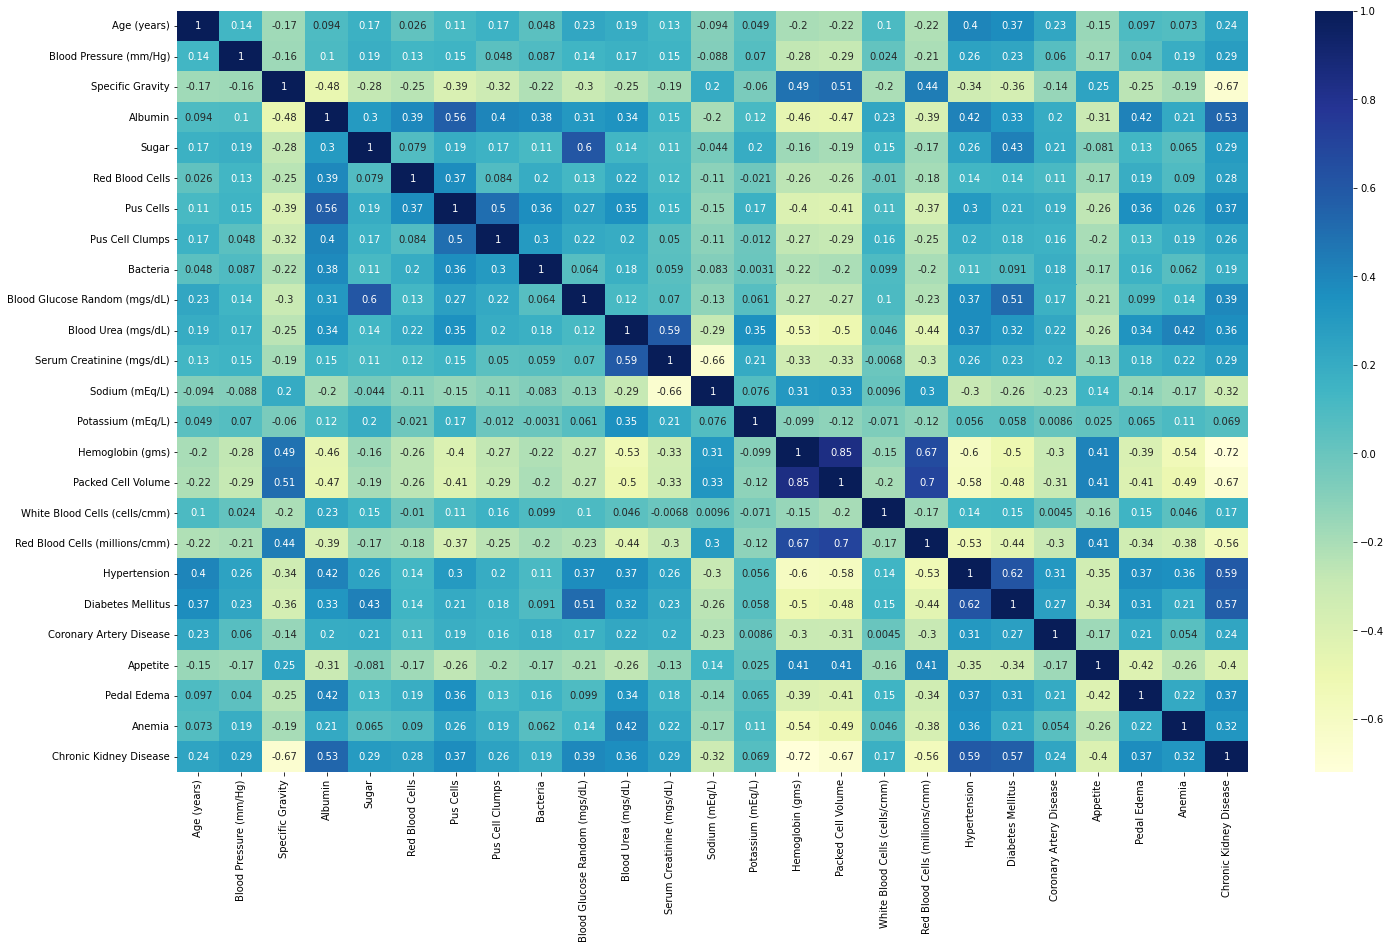

In [191]:
plt.figure(figsize=(24,14))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [192]:
data.head()

,Age (years),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,122.0,...,38.0,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0,1
1,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31.0,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0,1
2,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
3,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
4,60.0,90.0,1.015,3.0,0.0,0.0,0.0,0.0,0.0,74.0,...,39.0,7800.0,4.4,1.0,1.0,0.0,1.0,1.0,0.0,1


### Let's see our Target feature:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


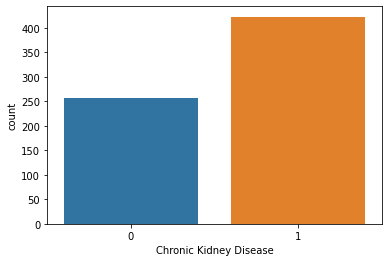

In [193]:
sns.countplot(data['Chronic Kidney Disease'])

In [195]:
data.to_csv("CleanedData/Cleaned_dataset.csv")